In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import math

In [2]:
new_model = tf.keras.models.load_model('saved_model.h5')

In [3]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


The task is to find number of cows in a given frame. 
Data provided: Frame (image) and number of cows in that image. Finding number of cows is a 'regression task' which is continuous. 

- First I tried with opencv to predict number of cows in a frame but the accuracy was very bad. So after doing some research I found out that 'Mobilenet' is giving decent accuracy for regression problems. So, I used 'MobileNet' pre trained model. 
- Source: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Farxiv.org%2Fpdf%2F1704.04861.pdf&clen=941241&chunk=true

- Abstract 
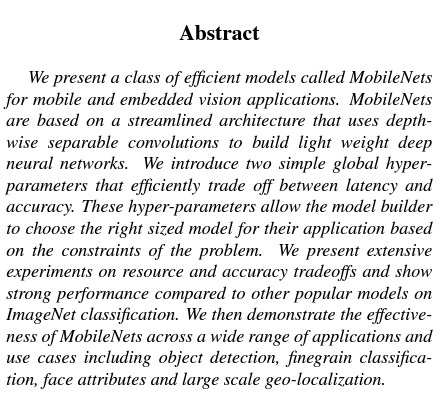

- Scores
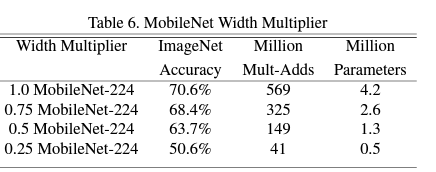



## Steps 
1. Create 500 samples data (500 images). Store the cow_count along with file name in 'final.csv' file and save the 500 images in 'Sample' folder. 
2. Output/Label: Read the cow_count as 'label' from 'final.csv' file. 
3. Input/Features: Read the 500 images from 'Sample' folder, resize the images to (224,224) and convert into numpy array. 
4. Now split the data into train and test. With 80% for training and 20% testing. 
5. Design the model: Use the pre trained 'MobileNet' model with activation function as 'ReLu'. 
6. Compile: use the 'adam' optimizer. loss function 'Mean Average Error'
7. Train Model: train the model with batch_size = 64, epochs = 25 and with callback function of monitoring 'val_loss' for 5 epochs. 
8. Once the model is trained, test it by predicting for 'x_test' 
9. Visualize: plot graph loss vs model loss.
10. Finally, save the model in .h5 format 
11. In main, load the saved model
12. Now read the frames from main function to predict number of cows in a frame. 

In [8]:
from NellieJay.NellieJay import NellieJay


if __name__ == "__main__":
    # Initialise a NellieJay Object
    my_smart_cow = NellieJay(height=720, width=1080, max_cows=6, delay=1)
   
    
    cnt = 100
    filenames = []
    count = []
    TOTAL_IMAGES = 600

    
    while True:
        # Generate a frame and return the number of cows placed on the frame
        frame, cow_count = my_smart_cow.generate_frame()      
        NoOfCows = cow_count
        img = frame      
        #cnt = CreateDataSet(frame, cnt, NoOfCows)   # Once training data is generated not required to call again
        
        #answer = predict_callback(frame) # Your cow count should go here
        answer = predict(frame)
        ############################################

        # Calculate and print the error to the screen and console 
        frame = my_smart_cow.print_scores(frame, cow_count, answer)
        # Show the frame on screen     
        my_smart_cow.show_frame(frame) 
        
        if cv2.waitKey(1) == ord('q') or cnt == TOTAL_IMAGES:
            break

cv2.destroyAllWindows() 

1/1 [==============================] - 1s 909ms/step
Frame: 1		 Actual: 5 		Prediction: 5 		MSE: 0.0		RMSE: 0.0
1/1 [==============================] - 0s 32ms/step
Frame: 2		 Actual: 5 		Prediction: 5 		MSE: 0.0		RMSE: 0.0
1/1 [==============================] - 0s 56ms/step
Frame: 3		 Actual: 6 		Prediction: 6 		MSE: 0.0		RMSE: 0.0
1/1 [==============================] - 0s 40ms/step
Frame: 4		 Actual: 3 		Prediction: 3 		MSE: 0.0		RMSE: 0.0
1/1 [==============================] - 0s 46ms/step
Frame: 5		 Actual: 3 		Prediction: 3 		MSE: 0.0		RMSE: 0.0
1/1 [==============================] - 0s 44ms/step
Frame: 6		 Actual: 4 		Prediction: 4 		MSE: 0.0		RMSE: 0.0
1/1 [==============================] - 0s 43ms/step
Frame: 7		 Actual: 4 		Prediction: 4 		MSE: 0.0		RMSE: 0.0
1/1 [==============================] - 0s 50ms/step
Frame: 8		 Actual: 6 		Prediction: 6 		MSE: 0.0		RMSE: 0.0
1/1 [==============================] - 0s 55ms/step
Frame: 9		 Actual: 4 		Prediction: 4 		MSE: 0.0		RMSE: 0.0


In [7]:
import cv2 
import math

def predict(frame):
    num = 1
    img_width, img_height = 224, 224
    file_name_path = r'test/'+ str(num) + '.jpg'
    cv2.imwrite(file_name_path, frame) 

    test_pic = cv2.imread(file_name_path)
    test_pic = cv2.resize(test_pic,(img_width, img_height))
    test_pic = test_pic.reshape(1,img_width, img_height,3)
    pred = new_model.predict(test_pic)
  
    return (math.floor(pred))

In [13]:
def  CreateDataSet(frame, cnt, NoOfCows): 
    
    filename = str(cnt) +'.jpg'
    filenames.append(filename)
    count.append(NoOfCows)    

    file_name_path = r'Samples/' + str(cnt)+'.jpg'
    cv2.imwrite(file_name_path, frame) 
  
    cnt += 1

    if cnt == TOTAL_IMAGES:
        # Create a data frame: Cow counts corresponding to file name
        df = pd.DataFrame({'Filenames': filenames, 'Count':count})
        df.to_csv("Final.csv", index = False)
    return cnt